In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('k_means_data.csv', index_col=0)
df.head()

customer_id  online_order  order_status  brand  product_line  \
product_id                                                                 
2                  2950             1             1      0             0   
3                  3120             0             1      1             0   
37                  402             1             1      2             0   
88                 3135             1             1      3             0   
78                  787             0             1      4             0   

            product_class  product_size  list_price  standard_cost  \
product_id                                                           
2                       0             0       71.49          53.62   
3                       0             1     2091.47         388.92   
37                      1             0     1793.43         248.82   
88                      0             0     1198.46         381.10   
78                      0             1     1765.30         709.48   

            past_3_years_bike_related_purchases  job_title  \
product_id                                                   
2                                            19          0   
3                                            89          1   
37                                            9          2   
88                                           83          3   
78                                           29          4   

            job_industry_category  wealth_segment  deceased_indicator  \
product_id                                                              
2                               0               3                   0   
3                               1               3                   0   
37                              2               0                   0   
88                              0               3                   0   
78                              2               0                   0   

            owns_car  tenure  postcode  state  property_valuation  
product_id                                                         
2                  1      10      3064      0                   6  
3                  1      10      2196      1                   5  
37                 0      22      2835      1                   1  
88                 0      16      2096      1                  10  
78                 1       2      2292      1                   7

In [3]:
df.shape

(19968, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 2 to 11
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   online_order                         19968 non-null  int64  
 2   order_status                         19968 non-null  int64  
 3   brand                                19968 non-null  int64  
 4   product_line                         19968 non-null  int64  
 5   product_class                        19968 non-null  int64  
 6   product_size                         19968 non-null  int64  
 7   list_price                           19968 non-null  float64
 8   standard_cost                        19968 non-null  float64
 9   past_3_years_bike_related_purchases  19968 non-null  int64  
 10  job_title                            19968 non-null  int64  
 11  job_industry_category          

In [5]:
df.describe()

customer_id  online_order  order_status         brand  product_line  \
count  19968.000000  19968.000000  19968.000000  19968.000000  19968.000000   
mean    1740.254307      0.544271      0.991086      2.435296      0.464994   
std     1009.819066      0.596599      0.093996      1.805075      0.882531   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%      861.750000      0.000000      1.000000      1.000000      0.000000   
50%     1739.500000      1.000000      1.000000      2.000000      0.000000   
75%     2614.250000      1.000000      1.000000      4.000000      1.000000   
max     3500.000000      3.000000      1.000000      6.000000      4.000000   

       product_class  product_size    list_price  standard_cost  \
count   19968.000000  19968.000000  19968.000000   19968.000000   
mean        0.479167      0.511969   1107.780004     550.660473   
std         0.780944      0.769633    582.852548     407.663819   
min         0.000000      0.000000     12.010000       0.000000   
25%         0.000000      0.000000    575.270000     215.030000   
50%         0.000000      0.000000   1163.890000     464.720000   
75%         1.000000      1.000000   1635.300000     795.100000   
max         3.000000      3.000000   2091.470000    1759.850000   

       past_3_years_bike_related_purchases     job_title  \
count                         19968.000000  19968.000000   
mean                             48.757412     67.207833   
std                              28.611359     51.870520   
min                               0.000000      0.000000   
25%                              24.000000     21.000000   
50%                              48.000000     60.000000   
75%                              73.000000    106.000000   
max                              99.000000    195.000000   

       job_industry_category  wealth_segment  deceased_indicator  \
count           19968.000000    19968.000000        19968.000000   
mean                3.347756        2.015675            0.000401   
std                 2.665799        1.214594            0.020013   
min                 0.000000        0.000000            0.000000   
25%                 1.000000        2.000000            0.000000   
50%                 3.000000        3.000000            0.000000   
75%                 6.000000        3.000000            0.000000   
max                 9.000000        3.000000            1.000000   

           owns_car        tenure      postcode         state  \
count  19968.000000  19968.000000  19968.000000  19968.000000   
mean       0.502905     10.443359   2987.623347      1.106971   
std        0.500004      5.828718    851.306647      0.862672   
min        0.000000      0.000000   2000.000000      0.000000   
25%        0.000000      6.000000   2200.000000      1.000000   
50%        1.000000     10.000000   2767.000000      1.000000   
75%        1.000000     15.000000   3754.000000      2.000000   
max        1.000000     22.000000   4883.000000      4.000000   

       property_valuation  
count        19968.000000  
mean             7.516376  
std              2.824783  
min              1.000000  
25%              6.000000  
50%              8.000000  
75%             10.000000  
max             12.000000

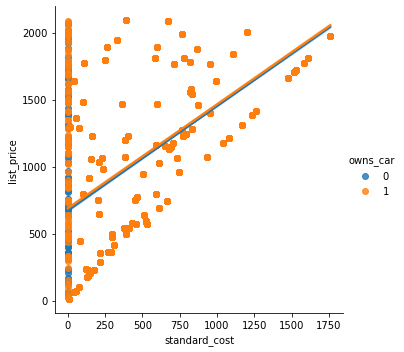

In [6]:
sns.lmplot(x='standard_cost', y='list_price', data=df,
          hue='owns_car')

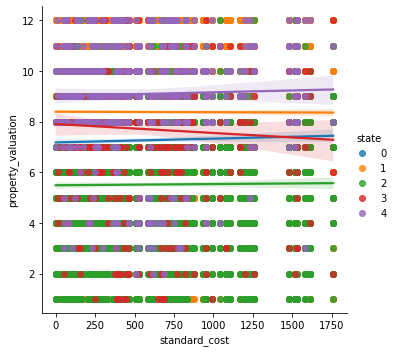

In [7]:
sns.lmplot(x='standard_cost', y='property_valuation', data=df,
          hue='state')

C:\Users\himan\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


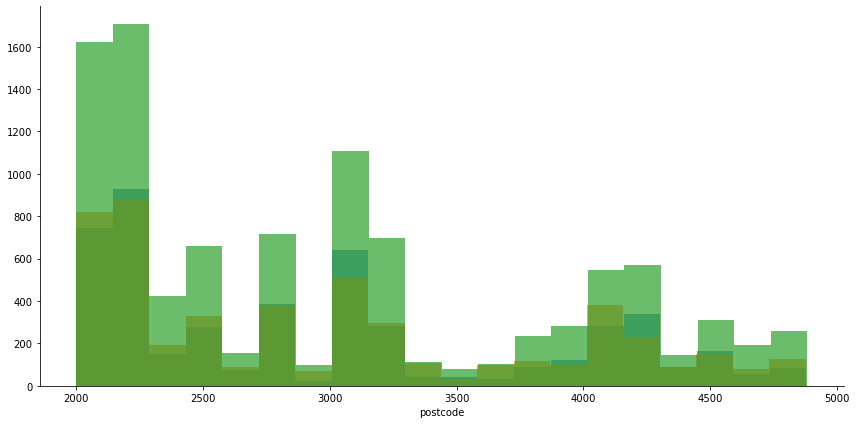

In [9]:
g = sns.FacetGrid(df, hue='wealth_segment', size=6, aspect=2)
g = g.map(plt.hist, 'postcode', bins=20, alpha=0.7)

C:\Users\himan\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


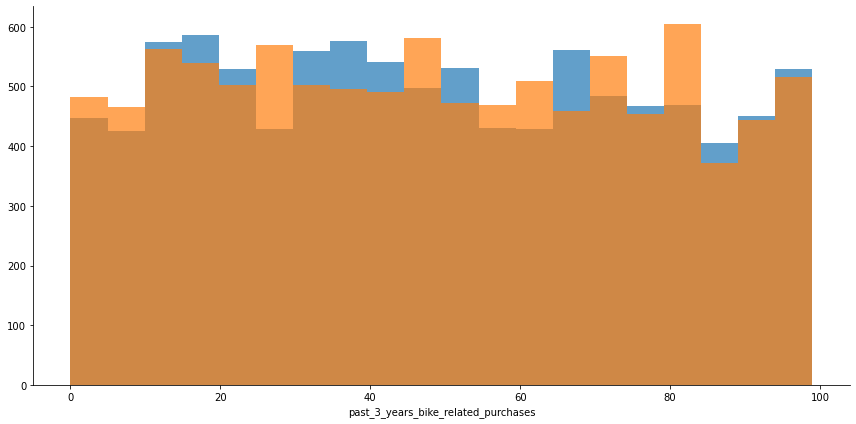

In [11]:
h = sns.FacetGrid(df, hue='owns_car', size=6, aspect=2)
h = h.map(plt.hist, 'past_3_years_bike_related_purchases', bins=20, alpha=0.7)

In [12]:
df[df['past_3_years_bike_related_purchases'] > 50]

customer_id  online_order  order_status  brand  product_line  \
product_id                                                                 
3                  3120             0             1      1             0   
88                 3135             1             1      3             0   
22                 1542             0             1      5             0   
15                 2459             1             1      5             0   
67                 1305             1             1      0             0   
...                 ...           ...           ...    ...           ...   
13                    5             1             1      0             0   
77                 2618             1             1      3             1   
41                  127             0             1      0             1   
87                 2284             0             1      2             0   
11                 1144             0             1      1             0   

            product_class  product_size  list_price  standard_cost  \
product_id                                                           
3                       0             1     2091.47         388.92   
88                      0             0     1198.46         381.10   
22                      0             0       60.34          45.26   
15                      0             0     1292.84          13.44   
67                      0             1     1071.23         380.74   
...                   ...           ...         ...            ...   
13                      0             0     1163.89         589.27   
77                      0             1     1240.31         795.10   
41                      0             0      416.98         312.74   
87                      0             0     1636.90          44.71   
11                      0             2     1775.81        1580.47   

            past_3_years_bike_related_purchases  job_title  \
product_id                                                   
3                                            89          1   
88                                           83          3   
22                                           56          6   
15                                           67          7   
67                                           97          8   
...                                         ...        ...   
13                                           56         88   
77                                           85         51   
41                                           81        111   
87                                           83        183   
11                                           73         54   

            job_industry_category  wealth_segment  deceased_indicator  \
product_id                                                              
3                               1               3                   0   
88                              0               3                   0   
22                              1               3                   0   
15                              4               2                   0   
67                              0               2                   0   
...                           ...             ...                 ...   
13                              7               0                   0   
77                              7               3                   0   
41                              0               3                   0   
87                              9               2                   0   
11                              1               2                   0   

            owns_car  tenure  postcode  state  property_valuation  
product_id                                                         
3                  1      10      2196      1                   5  
88                 0      16      2096      1                  10  
22                 1      12      2155      1                  10  
15             

In [13]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=7, random_state=100)

km.fit(df.drop('owns_car', axis=1))

KMeans(n_clusters=7, random_state=100)

In [14]:
km.cluster_centers_

array([[1.78490036e+03, 5.45750570e-01, 9.89905568e-01, 2.56561381e+00,
        4.83881472e-01, 4.88114621e-01, 6.04037773e-01, 1.43327611e+03,
        6.81591508e+02, 4.84549007e+01, 7.16405080e+01, 3.41452296e+00,
        1.97590361e+00, 1.24683250e-18, 1.06001303e+01, 2.51211136e+03,
        7.67828069e-01, 8.23347444e+00],
       [8.55396552e+02, 5.46238245e-01, 9.93730408e-01, 2.43221003e+00,
        4.64341693e-01, 4.51802508e-01, 5.10971787e-01, 1.11758208e+03,
        5.55607449e+02, 4.65094044e+01, 6.91920063e+01, 3.19592476e+00,
        2.02233542e+00, 1.13841228e-18, 1.08597179e+01, 4.21444592e+03,
        1.68652038e+00, 5.47296238e+00],
       [2.57379139e+03, 5.39726986e-01, 9.91249562e-01, 2.46867343e+00,
        4.90724536e-01, 4.75323766e-01, 5.01225061e-01, 1.11857771e+03,
        5.53350550e+02, 5.06755338e+01, 6.86835842e+01, 3.55057753e+00,
        2.02240112e+00, 1.19262239e-18, 1.03671684e+01, 4.21704305e+03,
        1.60308015e+00, 5.49282464e+00],
       [2.936

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(df['owns_car'], km.labels_))

print(classification_report(df['owns_car'], km.labels_))

[[1478 1343 1402 1259 1407 1518 1519]
 [1594 1209 1455 1470 1416 1471 1427]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.48      0.15      0.23      9926
           1       0.47      0.12      0.19     10042
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.13     19968
   macro avg       0.14      0.04      0.06     19968
weighted avg       0.48      0.13      0.21     19968



C:\Users\himan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


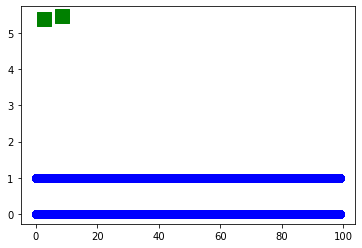

In [18]:
plt.scatter(df['past_3_years_bike_related_purchases'], df['owns_car'],
            s=50,c='b')
plt.scatter(8.55396552, 5.46238245, s=200, c='g', marker='s')
plt.scatter(2.57379139, 5.39726986, s=200, c='g', marker='s')

In [19]:
label = km.fit_predict(df)

In [22]:
label

array([4, 3, 6, ..., 2, 2, 6])

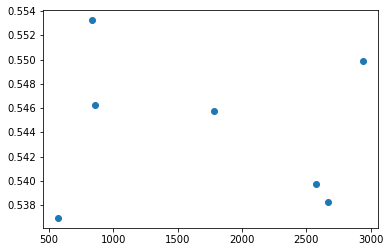

In [25]:
# filtered_label0 = df[label == 4]

plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1])
plt.show()

In [30]:
#Getting the Centroids
centroids = km.cluster_centers_
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

[0 1 2 3 4 5 6]


C:\Users\himan\anaconda3\lib\site-packages\pandas\core\common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


TypeError: unhashable type: 'numpy.ndarray'